In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

In [4]:
import os
source_dir=os.path.join('/content','gdrive','MyDrive','105_classes_pins_dataset')

In [5]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i))[:50]:
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(source_dir)

In [6]:
print('metadata shape :', metadata.shape)

metadata shape : (5250,)


In [7]:
metadata[150]

/content/gdrive/MyDrive/105_classes_pins_dataset/pins_Tom Holland/Tom Holland104_4692.jpg

In [8]:
type(metadata[1500]), metadata[1500].image_path()

(__main__.IdentityMetadata,
 '/content/gdrive/MyDrive/105_classes_pins_dataset/pins_Megan Fox/Megan Fox101_3368.jpg')

In [9]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [10]:
load_image('/content/gdrive/MyDrive/105_classes_pins_dataset/pins_Ursula Corbero/Ursula Corbero244_110.jpg')

array([[[105, 196, 161],
        [106, 193, 158],
        [109, 188, 156],
        ...,
        [ 95, 180, 151],
        [ 90, 175, 146],
        [ 86, 170, 146]],

       [[104, 194, 158],
        [104, 190, 155],
        [108, 185, 151],
        ...,
        [ 90, 175, 144],
        [ 84, 169, 140],
        [ 80, 164, 138]],

       [[102, 186, 150],
        [102, 182, 145],
        [108, 180, 143],
        ...,
        [ 88, 173, 142],
        [ 81, 164, 136],
        [ 76, 159, 133]],

       ...,

       [[177, 101,  69],
        [179, 103,  71],
        [183, 104,  73],
        ...,
        [ 61,  36,  32],
        [ 61,  36,  32],
        [ 61,  36,  32]],

       [[175,  98,  68],
        [178, 101,  71],
        [181, 102,  71],
        ...,
        [ 60,  35,  31],
        [ 61,  36,  32],
        [ 61,  36,  31]],

       [[173,  96,  66],
        [176,  99,  69],
        [179, 100,  69],
        ...,
        [ 60,  35,  31],
        [ 61,  36,  32],
        [ 61,  36,  31]]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [12]:
model = vgg_face()

model.load_weights('/content/gdrive/MyDrive/vgg_face_weights.h5')

In [13]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [14]:
type(vgg_face_descriptor)

keras.src.engine.functional.Functional

In [15]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [16]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 3s 3s/step
(2622,)


In [17]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.015672842, numpy.ndarray, numpy.float32)

In [18]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]

(0.0073238397, 0.0022011711, 0.0142918825)

In [19]:
total_images = len(metadata)

print('total_images :', total_images)

total_images : 5250


In [20]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0),verbose=0)[0]
    embeddings[i]=embedding_vector

In [31]:
import pickle
with open("embeddings5250.pkl","wb") as f:
  pickle.dump([metadata,embeddings],f)

In [32]:
with open("embeddings5250.pkl","rb") as f:
  mtd,embds = pickle.load(f)

In [36]:
embds[0]

array([ 0.01567284, -0.00588415,  0.00732384, ..., -0.01245726,
        0.01429188,  0.00634819])

In [44]:
def distance(emb1, emb2, threshold=0.8):

    return np.sum(np.square(emb1 - emb2))

In [45]:
def recognize(img_path):
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0),verbose=0)[0]
  distances = []
  names = []
  for i in range(len(embeddings)):
    dist = distance(embedding_vector,embeddings[i])
    if dist > 0:
      distances.append(dist)
      names.append(metadata[i].name)
  if distances:
    min_dist = min(distances)
    return names[distances.index(min_dist)]

  return "No Match Found"

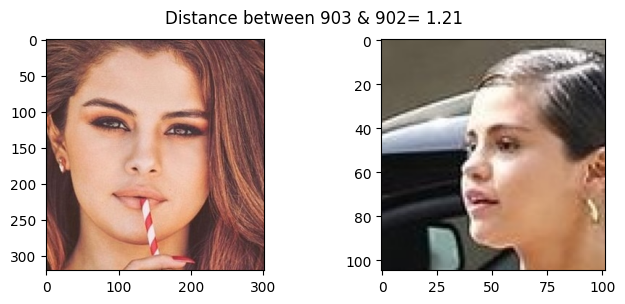

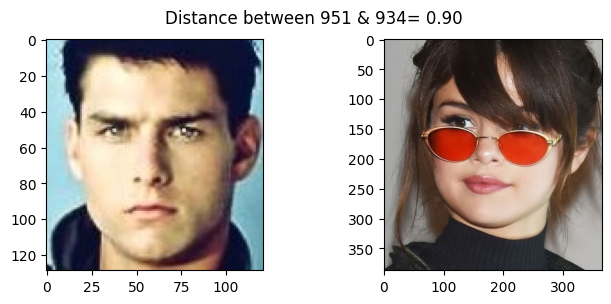

In [47]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

show_pair(903, 902)
show_pair(951, 934)

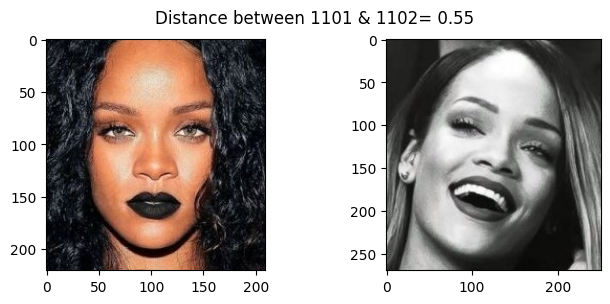

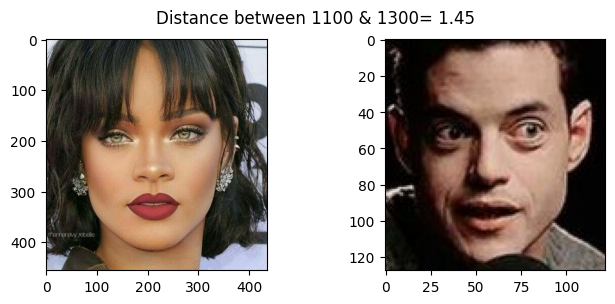

In [48]:
show_pair(1101, 1102)
show_pair(1100, 1300)

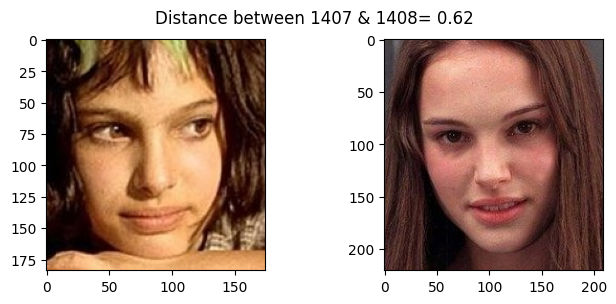

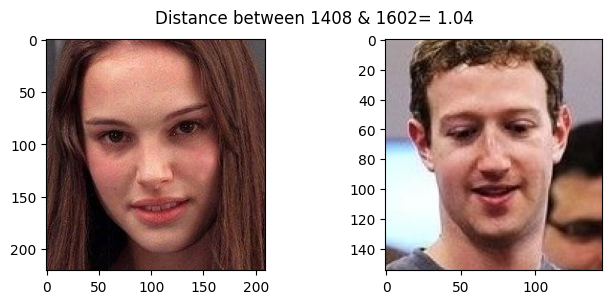

In [49]:
show_pair(1407, 1408)
show_pair(1408, 1602)

In [50]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

In [51]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (4666,2622)
y_train shape : (4666,)
X_test shape : (584,2622)
y_test shape : (584,)


In [52]:
y_test[0], y_train[988]

('pins_Tom Hardy', 'pins_Rihanna')

In [53]:
len(np.unique(y_test)), len(np.unique(y_train))

(105, 105)

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [55]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Adriana Lima' 'pins_Alex Lawther' 'pins_Alexandra Daddario'
 'pins_Alvaro Morte' 'pins_Amanda Crew' 'pins_Andy Samberg'
 'pins_Anne Hathaway' 'pins_Anthony Mackie' 'pins_Avril Lavigne'
 'pins_Ben Affleck' 'pins_Bill Gates' 'pins_Bobby Morley'
 'pins_Brenton Thwaites' 'pins_Brian J. Smith' 'pins_Brie Larson'
 'pins_Chris Evans' 'pins_Chris Hemsworth' 'pins_Chris Pratt'
 'pins_Christian Bale' 'pins_Cristiano Ronaldo' 'pins_Danielle Panabaker'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Eliza Taylor'
 'pins_Elizabeth Lail' 'pins_Emilia Clarke' 'pins_Emma Stone'
 'pins_Emma Watson' 'pins_Gwyneth Paltrow' 'pins_Henry Cavil'
 'pins_Hugh Jackman' 'pins_Inbar Lavi' 'pins_Irina Shayk'
 'pins_Jake Mcdorman' 'pins_Jason Momoa' 'pins_Jennifer Lawrence'
 'pins_Jeremy Renner' 'pins_Jessica Barden' 'pins_Jimmy Fallon'
 'pins_Johnny Depp' 'pins_Josh Radnor' 'pins_Katharine Mcphee'
 'pins_Katherine Langford' 'pins_Keanu Reeves' 'pins_Krysten Ritter'
 'pins_Leonardo DiCaprio' 'pins_Lili R

In [56]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [80 80 80 ...  3  3  3]
y_test_encoded :  [ 80  80  80  80  80  80  85  85  85  85  85  85  81  81  81  81  81  82
  82  82  82  82  82  87  87  87  87  87  86  86  86  86  86  86  83  83
  83  83  83  88  88  88  88  88  88  84  84  84  84  84 104 104 104 104
 104 104  72  72  72  72  72  72  77  77  77  77  77  71  71  71  71  71
  71  78  78  78  78  78  73  73  73  73  73  73 103 103 103 103 103  76
  76  76  76  76  76  75  75  75  75  75  74  74  74  74  74  74  79  79
  79  79  79  79  66  66  66  66  66  65  65  65  65  65  65  70  70  70
  70  70  68  68  68  68  68  68  62  62  62  62  62  61  61  61  61  61
  61  67  67  67  67  67  64  64  64  64  64  64  63  63  63  63  63  63
  69  69  69  69  69  56  56  56  56  56  56  60  60  60  60  60  55  55
  55  55  55  55 102 102 102 102 102  57  57  57  57  57  57  58  58  58
  58  58  54  54  54  54  54  54  59  59  59  59  59  59  52  52  52  52
  52  53  53  53  53  53  53 101 101 101 101 101  47  47  47  4

In [57]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [58]:
X_test_std = scaler.transform(X_test)

In [59]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (4666,2622)
y_train_encoded shape : (4666,)
X_test_std shape : (584,2622)
y_test_encoded shape : (584,)


In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [61]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [66]:
y_predict = clf.predict(X_test_pca)

In [67]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [ 80  80  80  80  80  80  85  85  85  85  85  73  81  81  81  81  81  82
  82  82  82  82  74  87  87  87  87  87  86  86  86  86  86  86  83  83
  83  83  83  70  88  88  88  88  88  84  84  84  84  84 104 104 104 104
 104 104  72  72  72  72  72   1  77  77  77  77  77  71  71  71  71  71
  71  78  78  73  78  78  73  68  73  73  73  73  97 103 103 103 103  76
  76  76  76  76  76  75  75  75  75  75  74  74  74  74  74  74  79  79
  79  79  79  79  66  69  66  39  66  65  65  65  65  65  65  70  70  70
  70  70  68  68  68  63  20  68  62  62  62  62  62  61  61  61  61  61
  61  67  67  67  67  67  64  64  64  64  64  64  63  63  63  63  63  63
  69  69  69  71  69  56  56  56  56  56  56  60  60  60  60  60  55  55
  55  55  55  55 102 102  51  73 102  26  57  57  87  52  57  58  58  58
  58  58  54  54  54  29  54  54  59  59  59  59  59  59  52  52  52  52
  52  53  53  53  53  53  53 101 101 101  50 101  47  47  47  47  47  47
 100 100 100 100 100  44  44  44  44  

In [68]:
y_predict_encoded = le.inverse_transform(y_predict)

In [69]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['pins_Tom Hardy' 'pins_Tom Hardy' 'pins_Tom Hardy' 'pins_Tom Hardy'
 'pins_Tom Hardy' 'pins_Tom Hardy' 'pins_Wentworth Miller'
 'pins_Wentworth Miller' 'pins_Wentworth Miller' 'pins_Wentworth Miller'
 'pins_Wentworth Miller' 'pins_Sarah Wayne Callies' 'pins_Tom Hiddleston'
 'pins_Tom Hiddleston' 'pins_Tom Hiddleston' 'pins_Tom Hiddleston'
 'pins_Tom Hiddleston' 'pins_Tom Holland' 'pins_Tom Holland'
 'pins_Tom Holland' 'pins_Tom Holland' 'pins_Tom Holland'
 'pins_Selena Gomez' 'pins_Zendaya' 'pins_Zendaya' 'pins_Zendaya'
 'pins_Zendaya' 'pins_Zendaya' 'pins_Zac Efron' 'pins_Zac Efron'
 'pins_Zac Efron' 'pins_Zac Efron' 'pins_Zac Efron' 'pins_Zac Efron'
 'pins_Tuppence Middleton' 'pins_Tuppence Middleton'
 'pins_Tuppence Middleton' 'pins_Tuppence Middleton'
 'pins_Tuppence Middleton' 'pins_Rihanna' 'pins_Zoe Saldana'
 'pins_Zoe Saldana' 'pins_Zoe Saldana' 'pins_Zoe Saldana'
 'pins_Zoe Saldana' 'pins_Ursula Corbero' 'pins_Ursula Corbero'
 'pins_Ursula Corbero' 'pins_

In [70]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (584,)
y_test_encoded shape :  (584,)


In [71]:
y_test_encoded[32:49]

array([86, 86, 83, 83, 83, 83, 83, 88, 88, 88, 88, 88, 88, 84, 84, 84, 84])

In [72]:
accuracy_score(y_test_encoded, y_predict)

0.9366438356164384

In [73]:
example_idx = 401

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [75]:
example_idx = 243

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [76]:
example_idx = 317

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

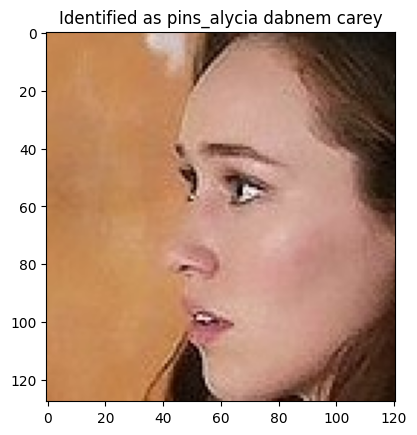

In [77]:
example_idx = -27

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');